<a href="https://colab.research.google.com/github/AasthaKaur/EV-Market-Segmentation/blob/main/EV_Feature_Engg_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

As the world becomes increasingly conscious of the environmental impact of transportation, electric cars have emerged as a potential solution to reduce carbon emissions and promote sustainability. However, the adoption of electric cars is still limited due to various factors, including high prices, limited range, and lack of charging infrastructure. To promote the widespread adoption of electric cars, it is essential to understand the current state of the electric car market and identify potential areas for improvement.

# What are we going to do

 In this study, we analyze a dataset containing information about electric cars to gain insights into the electric car market. We explore various aspects of the electric car market, including the distribution of electric cars by location, make, and model, as well as the eligibility of electric cars for clean alternative fuel vehicle incentives. We also analyze the electric utility companies that power the electric cars and examine the distribution of electric cars by price range.

**Import necessary Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re


import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)  # Display all columns

In [ ]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data (2).csv')

# View first 10 value on the Dataframe
display(df.head(10))

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
7,WDC0G5EB0K,Yakima,Naches,WA,98937.0,2019,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10,0,14.0,338148968,POINT (-120.69972 46.7309),PACIFICORP,5.307700e+10
8,1N4AZ0CP3D,Kitsap,Port Orchard,WA,98366.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,26.0,249239623,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
9,KNDCC3LD9K,Kitsap,Olalla,WA,98359.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,475609368,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10


**Data Preprocessing**

**Handling missing values by Dropping Rows**

The following columns have missing values:

1. Model (78 missing values)
2. Electric Range (1 missing value)
3. Base MSRP (1 missing value)
4. Legislative District (148 missing values)
5. DOL Vehicle ID (1 missing value)
6. Vehicle Location (19 missing values)
7. Electric Utility (227 missing values)
8. 2020 Census Tract (1 missing value)


Considering the relatively small number of missing values in these columns, we can safely drop these rows without significantly affecting the overall dataset. This way, we can proceed with our analysis using a dataset free of missing values.

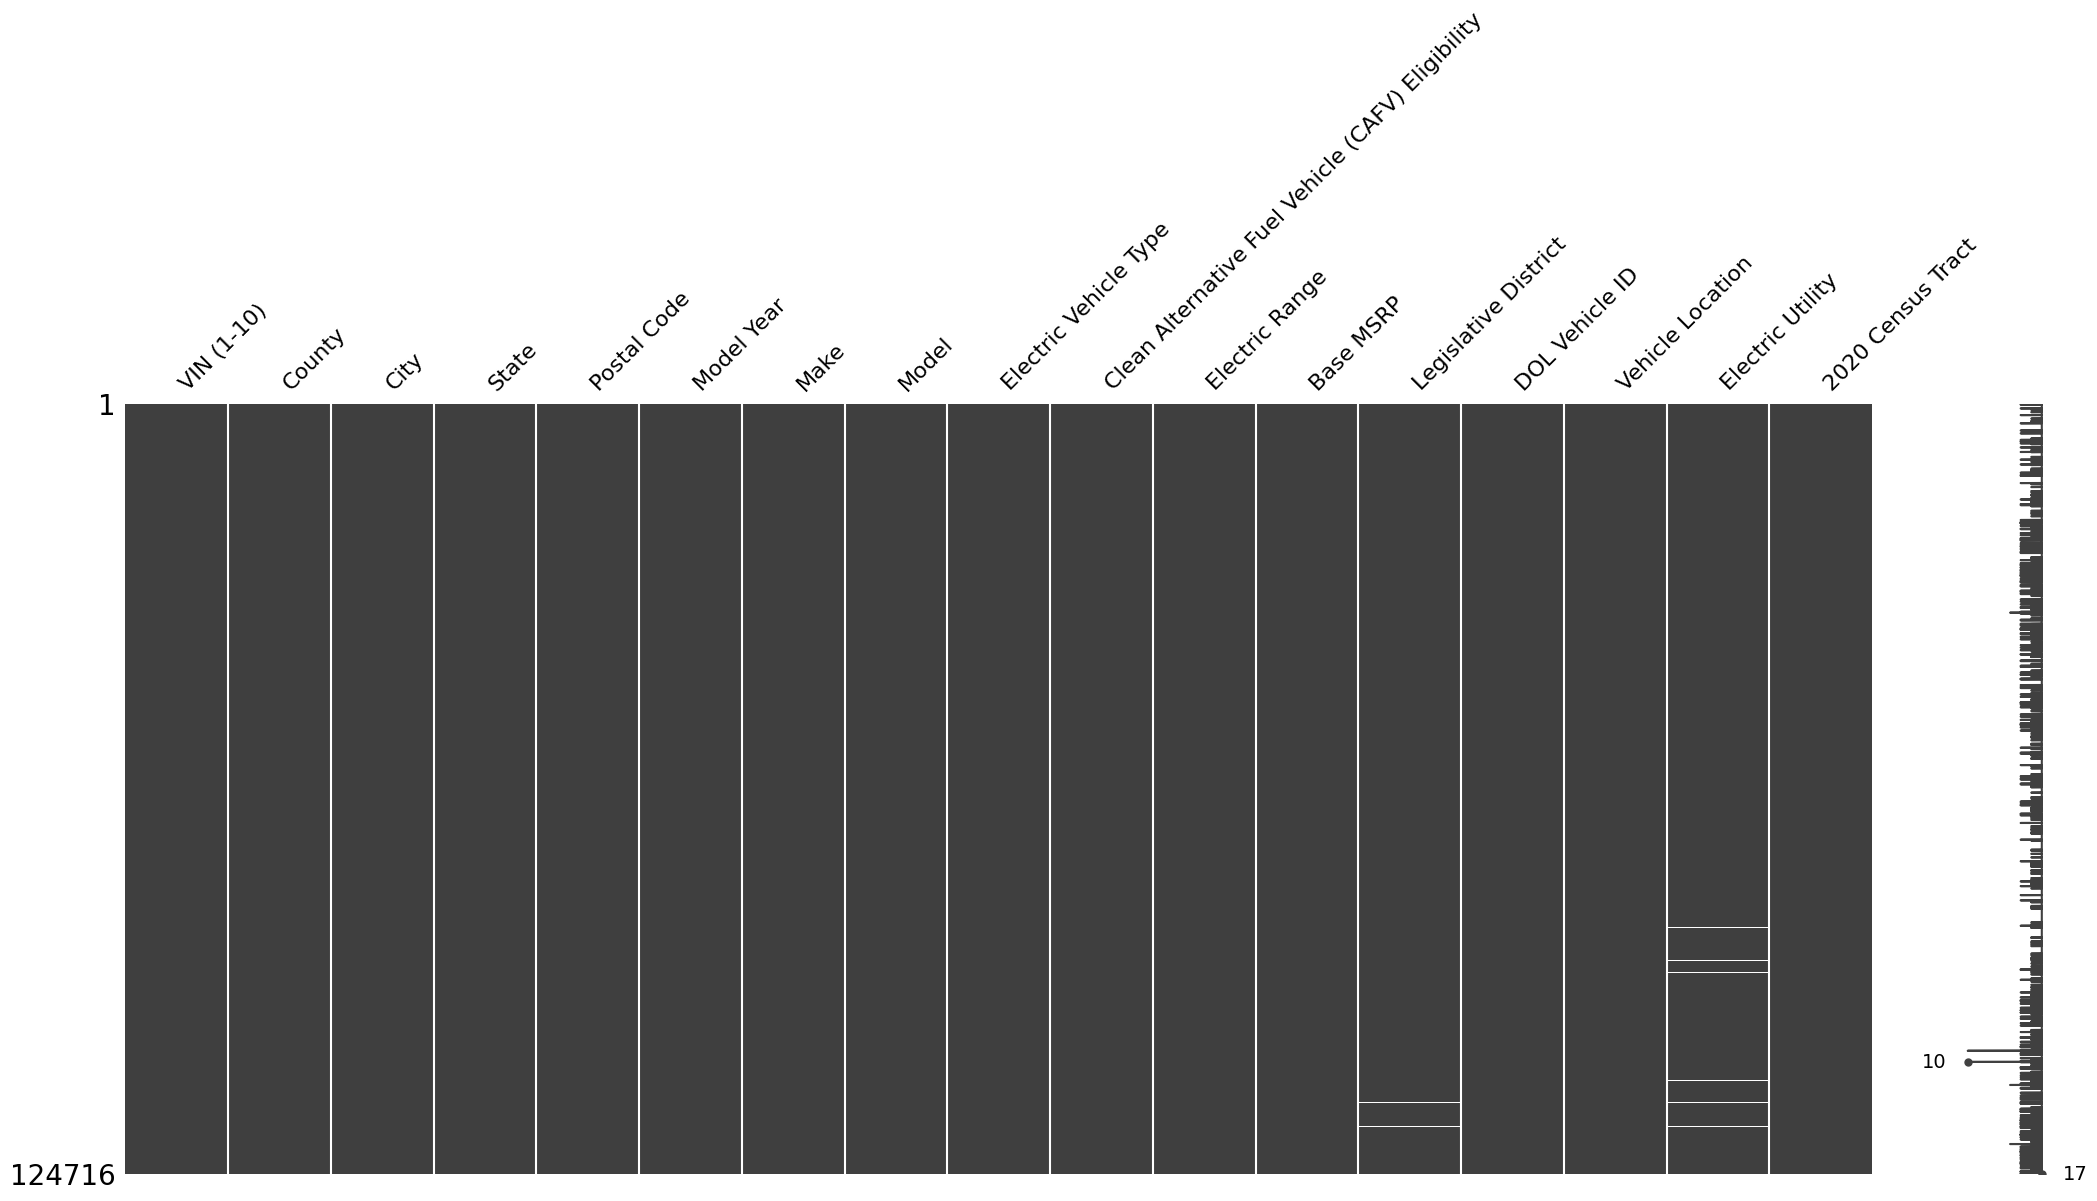

In [ ]:
# Visualize missing values using missingno
msno.matrix(df);

In [ ]:
# Dropping the missing values
df = df.dropna()

**Feature Engineering: Extracting Latitude and Longitude**

In our dataset, the Vehicle Location column contains both latitude and longitude coordinates as a string. To make these coordinates more accessible for further analysis, we will perform the following feature engineering steps:

1. Convert the Vehicle Location column to string type.
2. Create two new columns in the DataFrame, latitude and longitude.
3. Extract latitude and longitude values from the Vehicle Location column and store them in the respective new columns.


To achieve this, we define a function called *extract_coordinates()*, which takes two arguments: the input string (containing the coordinates) and the index (0 for latitude and 1 for longitude). The function uses regular expressions to find and return the floating-point numbers representing the coordinates. We then use the apply() function to apply this custom function to each element of the *Vehicle Location* column and populate the new latitude and longitude columns.


Finally, we drop any rows with missing values in the latitude and longitude columns to ensure a clean dataset for further analysis.

In [ ]:
# Convert the 'Vehicle Location' column to string type
df['Vehicle Location'] = df['Vehicle Location'].astype(str)

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

df['latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
df['longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

df = df.dropna(subset=['latitude', 'longitude'])

In [ ]:
df['Location'] = df['County'] + ', ' + df['City'] + ', ' + df['State']

**Feature Engineering: Creating a Price_Range_Category Column**


In our dataset, we have observed an unusual distribution of values in the **Base MSRP** column, with a large number of vehicles having a value of 0. This could potentially indicate missing or unknown values in the dataset. To account for this uncertainty and still make use of the available data, we have decided to create a new column called **Price_Range_Category** based on the **Base MSRP** values.

We have defined four categories for the **Price_Range_Category** column:

1. **"Unknown"**: If the **Base MSRP** value is 0, we assign this category as it might indicate missing or unknown values.
2. **"Low"**: If the **Base MSRP** value is less than 40,000, we assign this category.
3. **"Medium"**: If the **Base MSRP** value is between 40,000 and 60,000, we assign this category.
4. **"High"**: If the **Base MSRP** value is greater than 60,000, we assign this category.


By creating this new column, we can better understand the distribution of electric vehicle prices in our dataset and account for the potential uncertainty introduced by the large number of 0 values in the **Base MSRP** column.

In [ ]:
df['Base MSRP'].value_counts()

0         120656
69900       1429
31950        402
52900        167
32250        155
54950        138
59900        127
39995        119
36900         98
44100         97
64950         87
33950         80
45600         74
34995         63
52650         61
36800         51
55700         48
53400         35
110950        21
98950         21
81100         19
75095         16
90700         16
102000        14
184400        12
43700         11
109000         7
89100          6
91250          4
32995          3
845000         1
Name: Base MSRP, dtype: int64

In [ ]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Unknown"
        elif price < 40000:
            return "Low"
        elif price < 60000:
            return "Medium"
        else:
            return "High"

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

df = create_price_range_category(df, column='Base MSRP')

**Feature Engineering: Creating an 'Electric_Range_Category' Column**


In our dataset, we have observed an unusual distribution of values in the 'Electric Range' column, with a large number of vehicles having a value of 0. This could potentially indicate missing or unknown values in the dataset. To account for this uncertainty and still make use of the available data, we have decided to create a new column called 'Electric_Range_Category' based on the 'Electric Range' values.


We have defined four categories for the 'Electric_Range_Category' column:

1. "Unknown": If the 'Electric Range' value is 0, we assign this category as it might indicate missing or unknown values.
2. "Short": If the 'Electric Range' value is less than 150, we assign this category.
3. "Medium": If the 'Electric Range' value is between 150 and 300, we assign this category.
4. "Long": If the 'Electric Range' value is greater than 300, we assign this category.

By creating this new column, we can better understand the distribution of electric vehicle ranges in our dataset and account for the potential uncertainty introduced by the large number of 0 values in the 'Electric Range' column.

In [ ]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

In [ ]:
# Displaying the cleaned and feature engineered DataFrame
display(df.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude,Location,Price_Range_Category,Electric_Range_Category
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA",Unknown,Long
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,-120.56916,46.58514,"Yakima, Yakima, WA",Unknown,Medium
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,-122.18384,47.80310,"Snohomish, Bothell, WA",Unknown,Short
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10,-122.20596,47.97659,"Snohomish, Everett, WA",Unknown,Short
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10,-122.64681,47.73689,"Kitsap, Poulsbo, WA",Unknown,Medium


# EDA

In [ ]:
def plot_value_counts(df, column, top_n=None):
    # Get the value counts for the specified column
    value_counts = df[column].value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Create the pie chart
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Percentage of {column}', fontsize=14)

    # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Count of {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)

    # Set the suptitle for the entire figure
    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)

    # Show the plots
    plt.show()

def plot_coordinates_seaborn(df, cmap_column=None, top_n=None, figsize=(15, 10)):
    # Drop duplicate latitude and longitude pairs
    unique_coordinates = df[['latitude', 'longitude']].drop_duplicates()

    if cmap_column and top_n:
        # Include the cmap_column in the unique_coordinates DataFrame
        unique_coordinates[cmap_column] = df[cmap_column]

        # Get the top N most frequent categories in the specified column
        top_categories = unique_coordinates[cmap_column].value_counts().head(top_n).index.tolist()

        # Filter the unique_coordinates DataFrame to keep only the top N categories
        filtered_coordinates = unique_coordinates[unique_coordinates[cmap_column].isin(top_categories)]

        # Create a scatter plot using Seaborn with hue parameter
        plt.figure(figsize=figsize)
        sns.scatterplot(data=filtered_coordinates, x='longitude', y='latitude', hue=cmap_column, palette='viridis', edgecolor=None, s=50)
        plt.title(f'Latitude and Longitude Points (Top {top_n} {cmap_column})')
    else:
        # Create a scatter plot using Seaborn without hue parameter
        plt.figure(figsize=figsize)
        sns.scatterplot(data=unique_coordinates, x='longitude', y='latitude', color='darkcyan', edgecolor=None, s=50)
        plt.title('Latitude and Longitude Points')

    # Show the plot
    plt.show()

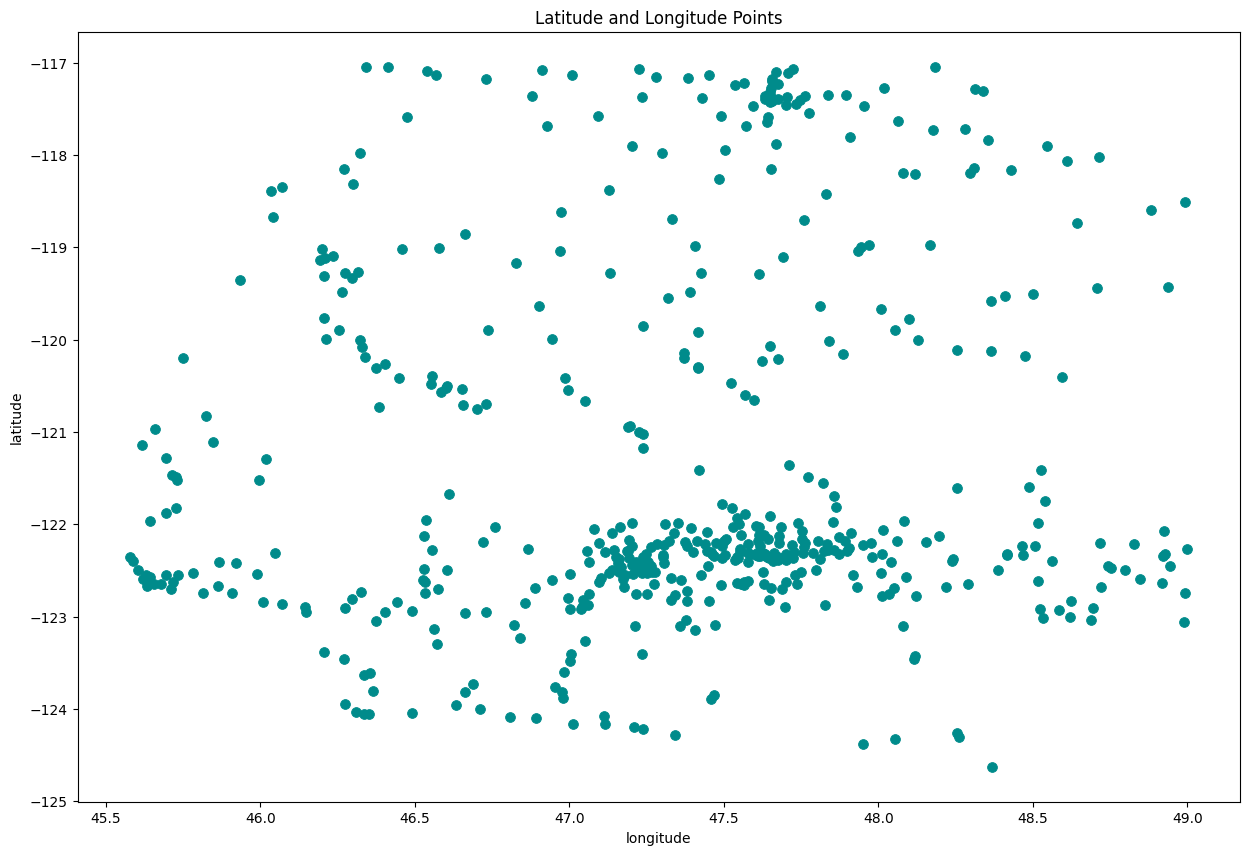

In [ ]:
plot_coordinates_seaborn(df)  # Default geolocations without any modifications

**Electric Car Dataset Analysis: Location**

The 'Location' column in the Electric Car dataset provides information about the location of the electric cars. The following are the value counts of the 'Location' column:

<table>
<tr>
<td>Location</td>
<td>Count</td>
</tr>
<tr>
<td>King, Seattle, WA</td>
<td>21942</td>
</tr><tr>
<td>King, Bellevue, WA</td>
<td>6476</td>
</tr><tr>
<td>King, Redmond, WA</td>
<td>4641</td>
</tr><tr>
<td>Clark, Vancouver, WA</td>
<td>4462</td>
</tr><tr>
<td>King, Kirkland, WA</td>
<td>3920</td>
</tr><tr>
<td>King, Sammamish, WA</td>
<td>3650</td>
</tr><tr>
<td>King, Renton, WA</td>
<td>3112</td>
</tr><tr>
<td>Snohomish, Bothell, WA</td>
<td>3014</td>
</tr><tr>
<td>Thurston, Olympia, WA</td>
<td>3014</td>
</tr><tr>
<td>Pierce, Tacoma, WA</td>
<td>2651</td>
</tr>
</table>

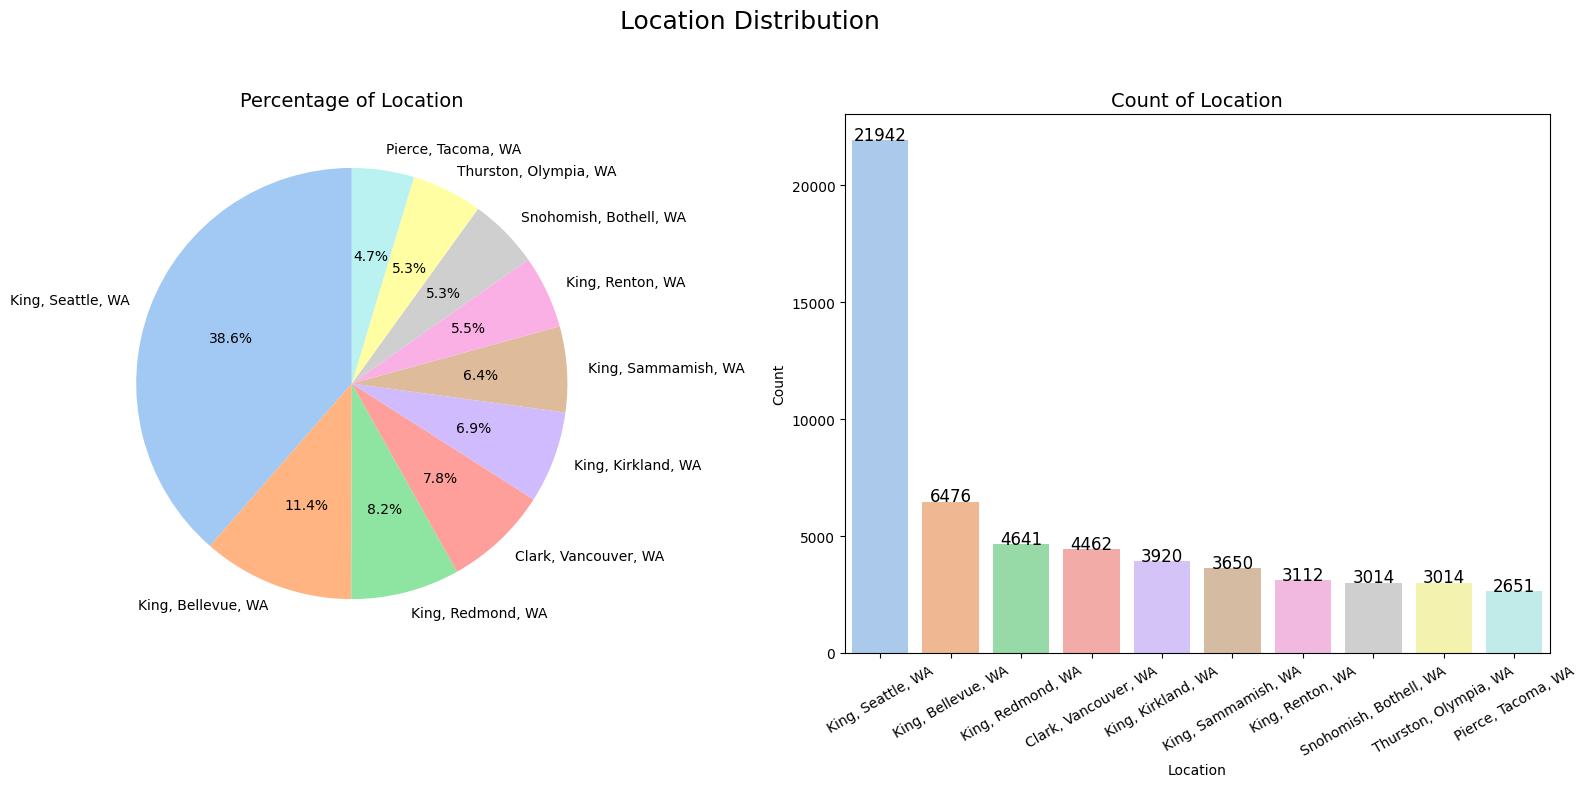

In [ ]:
plot_value_counts(df, 'Location', top_n=10)

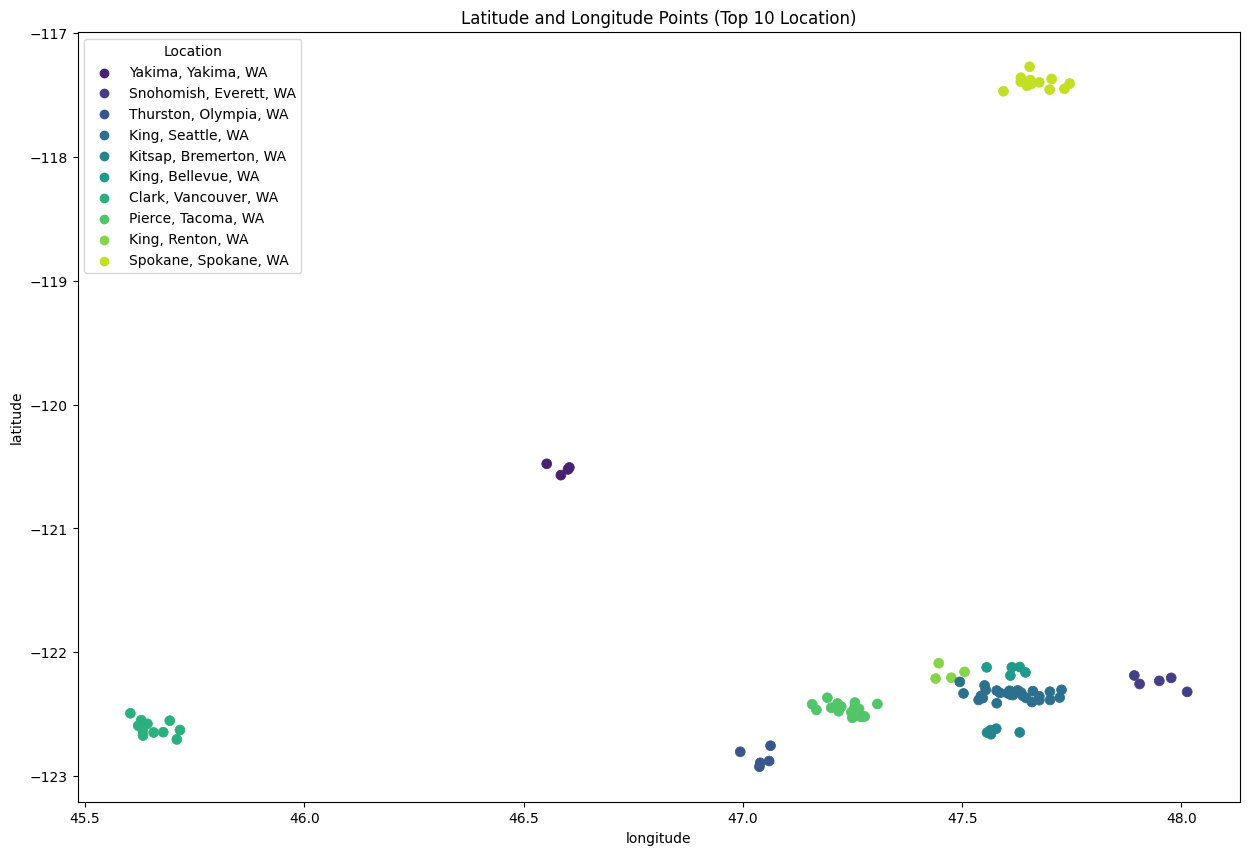

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Location', top_n=10)


**Inference and Insights**

From the above value counts, we can make the following inferences and gain insights:

1. The top 10 electric cars count in the dataset are primarily located in the state of Washington (WA), with no cars from other states.
2. The highest number of electric cars are located in King county, with Seattle having the highest count of 21942 cars. This indicates that the majority of electric cars are concentrated in urban areas, particularly in large cities like Seattle and Bellevue.
3. The next most common location is Clark county, with Vancouver having a count of 4462 cars.

Based on the analysis, the following recommendations can be made for electric car advocacies:

1. Focus on urban areas: Since the majority of electric cars are located in urban areas, electric car advocacies should focus on promoting the use of electric cars in cities, particularly in large cities like Seattle and Bellevue.

2. Expand to other counties: While King and Clark counties have the highest number of electric cars, there is still potential to expand the use of electric cars in other counties in the state of Washington. Advocacies should consider reaching out to these counties and promoting the benefits of electric cars.

3. Target specific cities: Within counties with a high number of electric cars, there may be specific cities or neighborhoods with lower adoption rates. Advocacies should target these areas and promote the use of electric cars through targeted marketing and outreach efforts.


## Electric Car Dataset Analysis: CAFV Eligibility

The 'CAFV Eligibility' column in the Electric Car dataset provides information about whether a given electric car is eligible for Clean Alternative Fuel Vehicle (CAFV) incentives based on its battery range. The following are the value counts of the 'CAFV Eligibility' column:

<table>
<tr>
<td>CAFV Eligibility</td>
<td>Count</td>
</tr>
<tr>
<td>Clean Alternative Fuel Vehicle Eligibility</td>
<td>59092</td>
</tr>
<tr>
<td>Eligibility unknown as battery range has not been researched</td>
<td>49346</td>
</tr>
<tr>
<td>Not eligible due to low battery range</td>
<td>15600</td>
</tr>
</table>

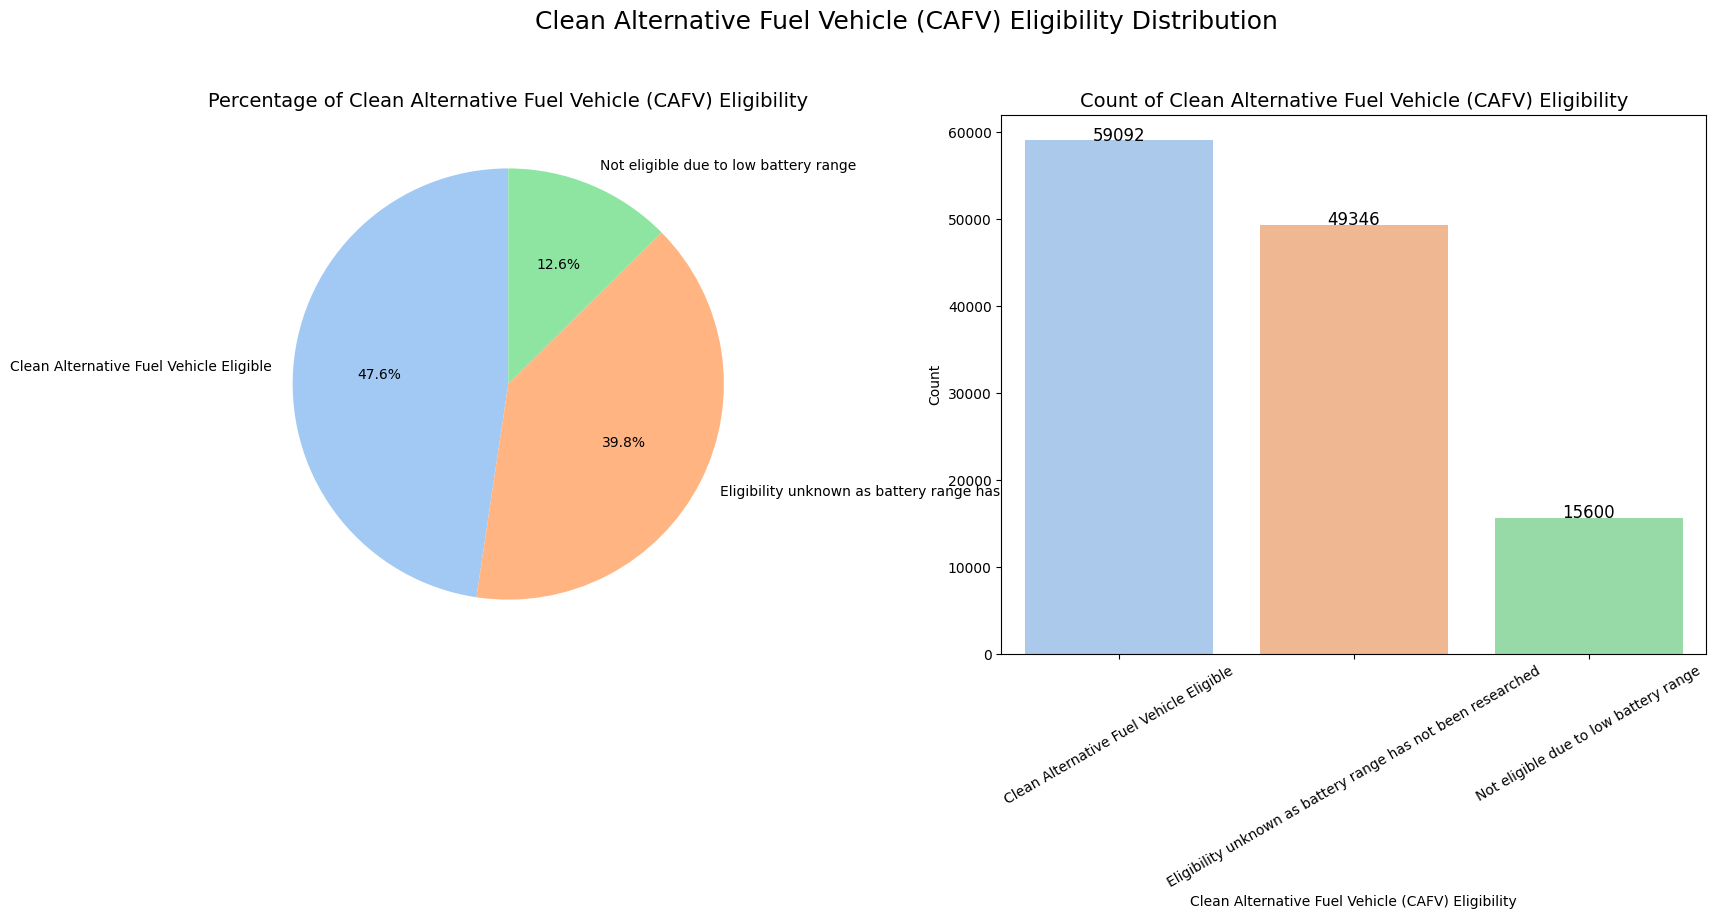

In [ ]:
plot_value_counts(df, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', top_n=3)

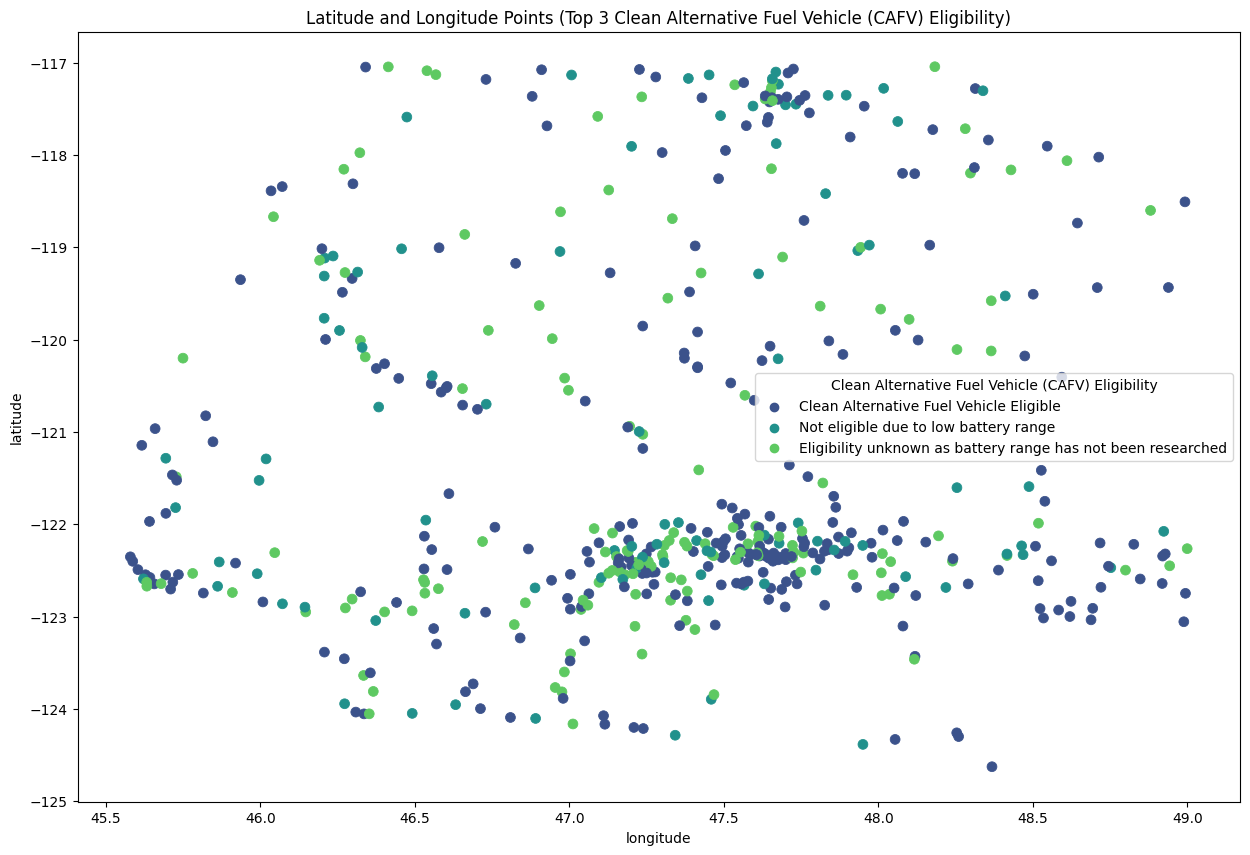

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Clean Alternative Fuel Vehicle (CAFV) Eligibility', top_n=3)

Electric vehicles (EVs) are gaining traction as a sustainable and environmentally friendly alternative to traditional internal combustion engine vehicles. As the transportation sector is a significant contributor to greenhouse gas emissions, the adoption of electric vehicles can play a critical role in reducing the overall carbon footprint. Analyzing the data available on electric vehicles can provide valuable insights and help inform future strategies to promote their adoption.

Based on the value counts provided for the electric car dataset, we can make a few inferences and provide the following recommendations:

1. Promote clean alternative fuel vehicles: A significant portion (about 47.5%) of the vehicles in the dataset are classified as "Clean Alternative Fuel Vehicle Eligible." This indicates that there is a growing interest in and adoption of electric vehicles. Efforts should be made to encourage the use of clean alternative fuel vehicles by offering incentives, improving infrastructure, and educating consumers about the environmental and financial benefits of owning such vehicles.

2. Research and data collection for battery range: There is a significant number of vehicles (about 39.8%) with "Eligibility unknown as battery range has not been researched." To improve the understanding of the electric vehicle market, it is essential to collect and analyze data on battery range for all electric vehicles. This will help in making better recommendations for consumers and also help in the development of policies and regulations surrounding electric vehicles.

3. Improve battery technology: About 12.7% of the vehicles are "Not eligible due to low battery range." This indicates that there is still room for improvement in battery technology. Investing in research and development to enhance battery performance will not only help increase the range of electric vehicles but also improve their overall efficiency and attractiveness to potential buyers.

4. Expand charging infrastructure: A significant barrier to the adoption of electric vehicles are the lack of charging infrastructure. Expanding the availability of charging stations, especially in urban and high-traffic areas, will make electric vehicles more accessible and convenient for users.

5. Increase public awareness: It is crucial to create awareness about the benefits of electric vehicles and clean alternative fuel options. Public campaigns, educational programs, and partnerships with local communities can help in promoting the adoption of electric vehicles and in reducing the overall carbon footprint.

## Electric Cars Dataset Analysis: Makers

The 'Make' column in the Electric Car dataset provides information about the top 10 makers of the elctric vehicles. The following values counts of the 'Make' column:

<table>
<tr>
<td>Make</td>
<td>Count</td>
</tr>
<tr>
<td>TESLA</td>
<td>56906</td>
</tr><tr>
<td>NISSAN</td>
<td>12912</td>
</tr>
<tr>
<td>CHEVROLET</td>
<td>10797</td>
</tr><tr>
<td>FORD</td>
<td>6635</td>
</tr><tr>
<td>BMW</td>
<td>5556</td>
</tr><tr>
<td>KIA</td>
<td>4831</td>
</tr><tr>
<td>TOYOTA</td>
<td>4631</td>
</tr><tr>
<td>VOLKSWAGEN</td>
<td>3356</td>
</tr><tr>
<td>AUDI</td>
<td>2472</td>
</tr><tr>
<td>VOLVO</td>
<td>2324</td>
</tr>
</table>

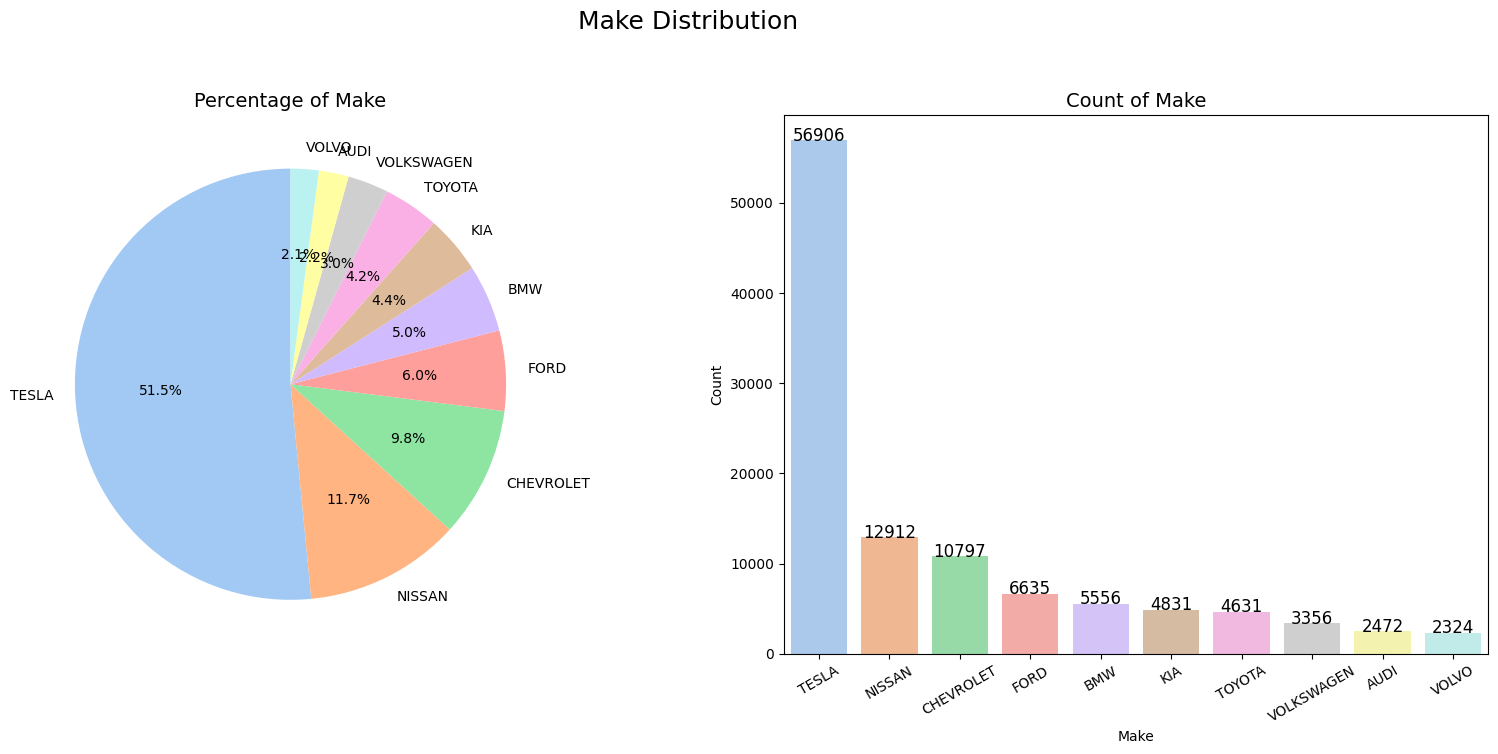

In [ ]:
plot_value_counts(df, 'Make', top_n=10)

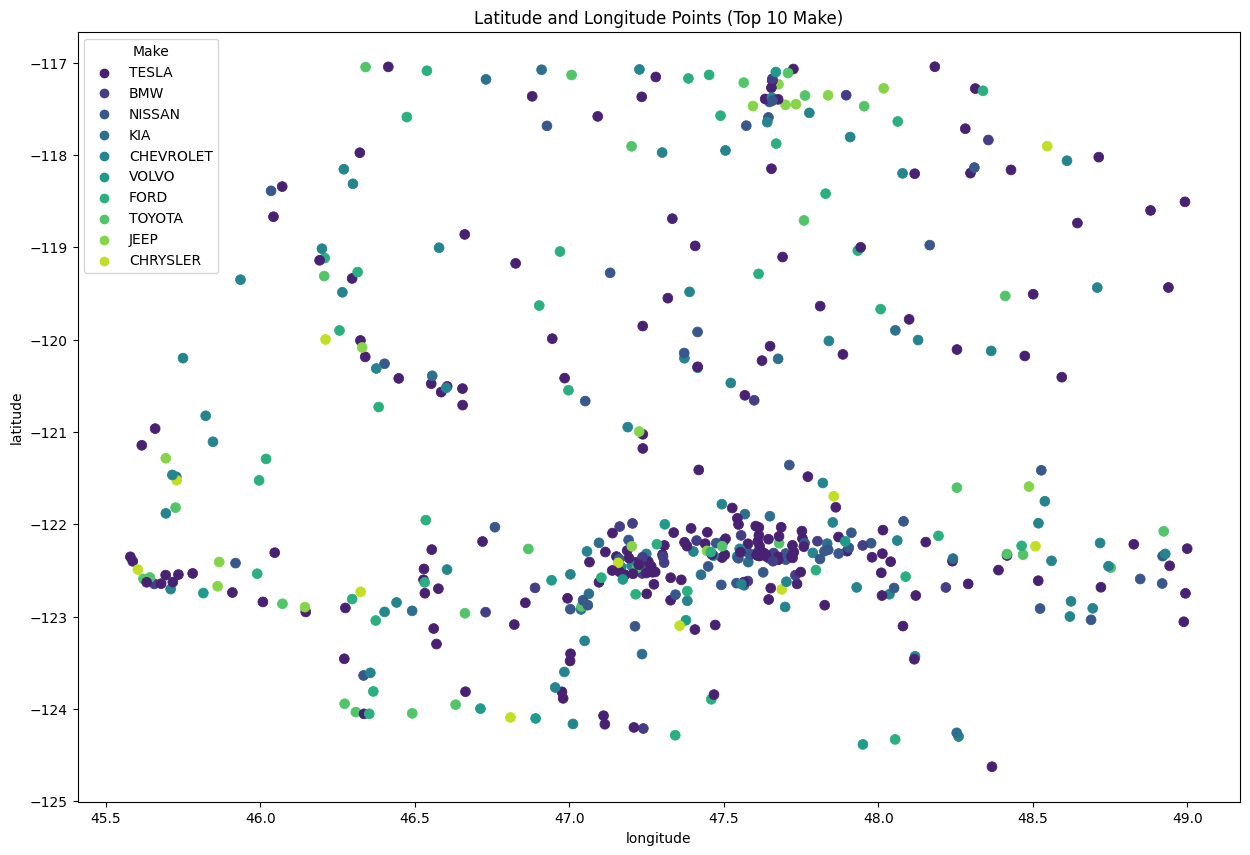

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Make', top_n=10)


**Inference and Insights**

From the above value counts, we can make the following inferences and gain insights:

1. The majority of electric cars in the dataset are from the Tesla make, with 56,906 cars falling into this category.
2. The next most common makes are Nissan and Chevrolet, with 12,912 and 10,797 cars respectively.
3. The rest of the makes have relatively smaller counts, with Volvo having the lowest count of 2,324 cars.

Based on the analysis, the following recommendations can be made for electric car advocacies:

1. Promote Tesla electric cars: Since the majority of electric cars in the dataset are from the Tesla make, electric car advocacies should focus on promoting Tesla electric cars to encourage more people to purchase them.

2. Encourage diversity in make: While Tesla is the dominant make in the dataset, there are other makes with a significant number of cars. Electric car advocacies should encourage diversity in make and promote the benefits of each make to encourage more people to purchase electric cars.

3. Advocate for increased availability of less common makes: Electric car advocacies should advocate for increased availability of less common makes, such as Volvo and Audi, to increase consumer choice and promote diversity in the electric car market.



## Electric Cars Dataset Analysis: Model

The 'Model' column in the Electric Car dataset provides information about the top 10 models of the elctric vehicles. The following values counts of the 'Model' column:

<table>
<tr>
<td>Model</td>
<td>Count</td>
</tr>
<tr>
<td>MODEL 3</td>
<td>24300</td>
</tr><tr>
<td>MODEL Y</td>
<td>20609</td>
</tr>
<tr>
<td>LEAF</td>
<td>12890</td>
</tr><tr>
<td>MODEL S</td>
<td>7314</td>
</tr><tr>
<td>BOLT EV</td>
<td>4974</td>
</tr><tr>
<td>VOLT</td>
<td>4864</td>
</tr><tr>
<td>MODEL X</td>
<td>4634</td>
</tr><tr>
<td>PRIUS PRIME</td>
<td>2421</td>
</tr><tr>
<td>ID.4</td>
<td>2318</td>
</tr><tr>
<td>NIRO</td>
<td>2286</td>
</tr>
</table>

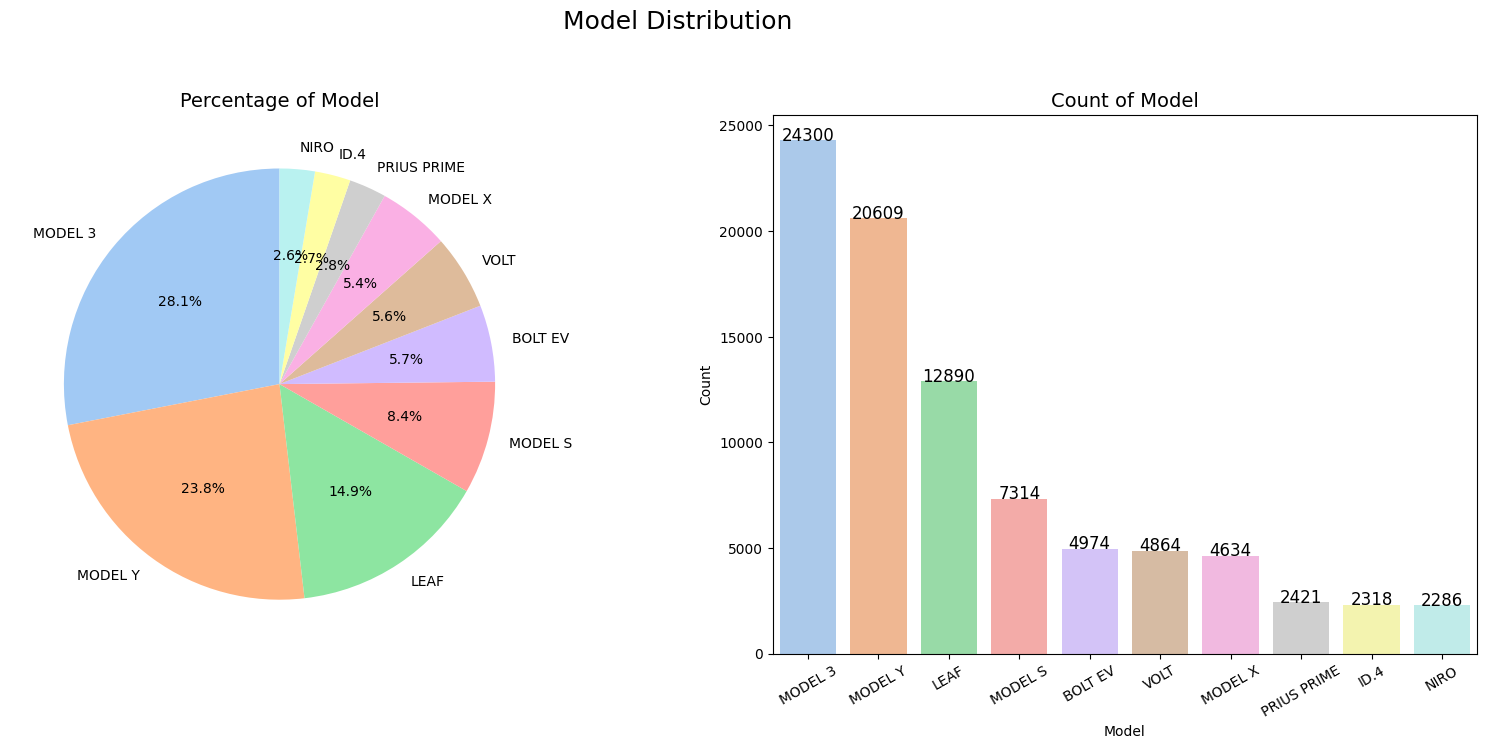

In [ ]:
plot_value_counts(df, 'Model', top_n=10)

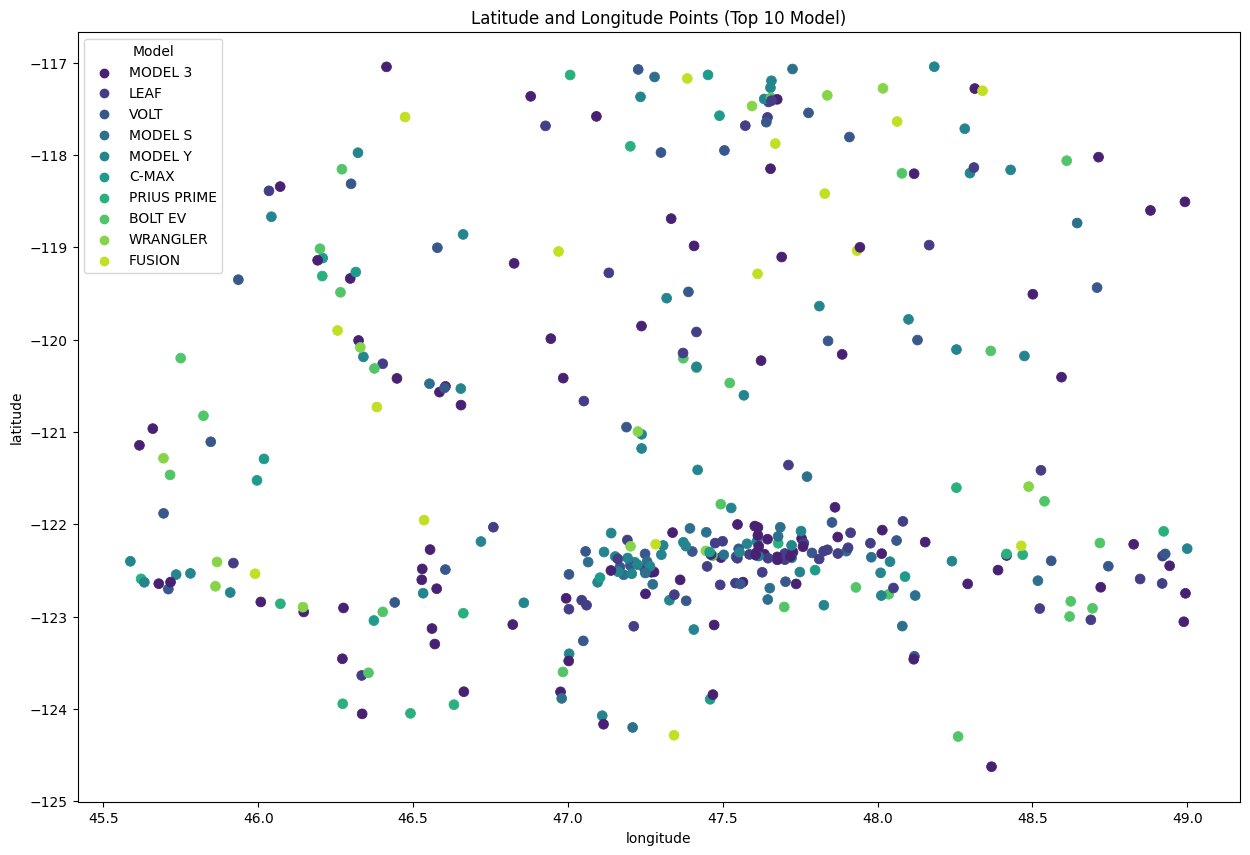

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Model', top_n=10)

**Inference and Insights**

From the above value counts, we can make the following inferences and gain insights:

1. The most common model of electric car in the dataset is the Tesla Model 3, with 24,300 cars falling into this category.
2. The next most common model is the Tesla Model Y, with 20,609 cars.
3. The Nissan Leaf is the third most common model, with 12,890 cars.
4. The remaining models have relatively smaller counts, with the Niro having the lowest count of 2,286 cars.

Based on the analysis, the following recommendations can be made for electric car advocacies:

1. Promote popular models: Since the most common models in the dataset are the Tesla Model 3 and Model Y, electric car advocacies should focus on promoting these models to encourage more people to purchase them.

2. Encourage diversity in model: While the most common models are dominated by Tesla and Nissan, there are other models with a significant number of cars. Electric car advocacies should encourage diversity in model and promote the benefits of each model to encourage more people to purchase electric cars.

3. Advocate for increased availability of less common models: Electric car advocacies should advocate for increased availability of less common models, such as the VW ID.4 and Kia Niro, to increase consumer choice and promote diversity in the electric car market.

## Electric Car Dataset Analysis: Electric Vehicle Type

The 'Electric Vehicle Type' column in the Electric Car dataset provides information about the type of electric vehicle. The following are the value counts of the 'Electric Vehicle Type' column:


<table>
<tr>
<td>Electruc Vehicle Type</td>
<td>Count</td>
</tr>
<tr>
<td>Battery Electric Vehicle (BEV)</td>
<td>95753</td>
</tr>
<tr>
<td>Plug-in Hybrid Electric Vehicle</td>
<td>28285</td>
</tr>
</table>

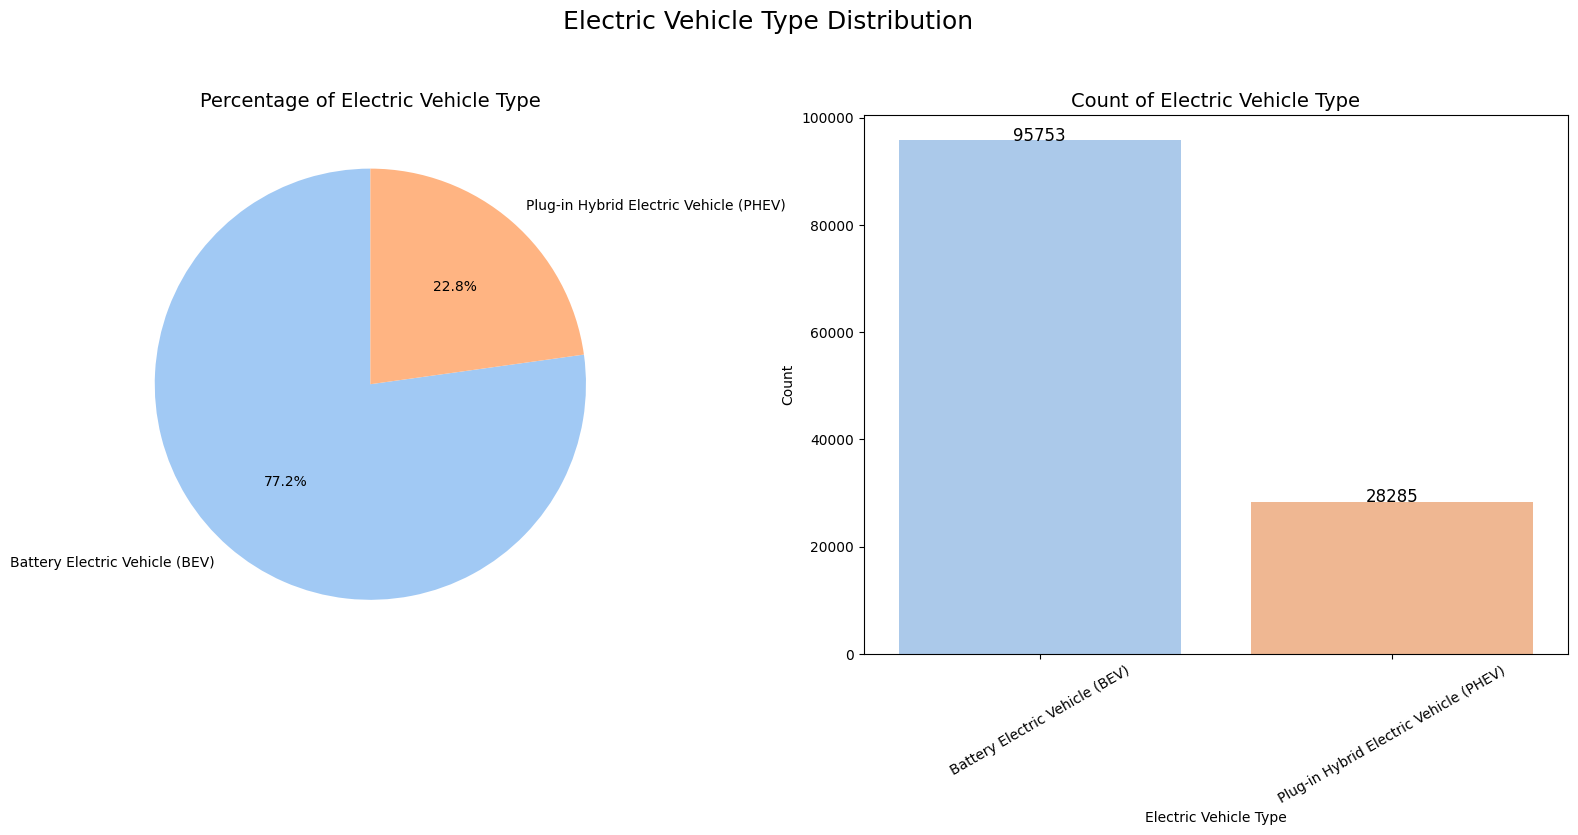

In [ ]:
plot_value_counts(df, 'Electric Vehicle Type', top_n=2)

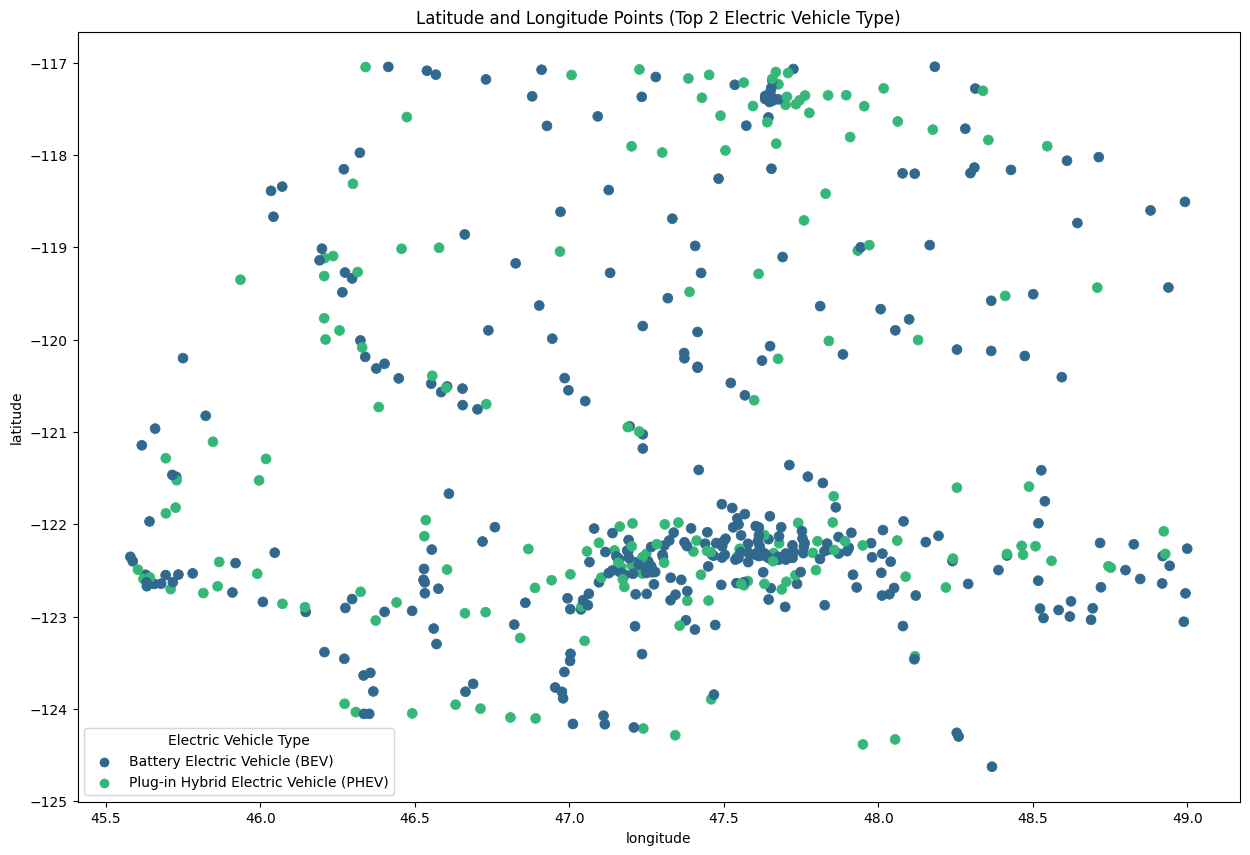

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Electric Vehicle Type', top_n=2)

**Inference and Insights**

From the above value counts, we can make the following inferences and gain insights:

1. Battery electric vehicles (BEVs) are the most common type of electric vehicle in the dataset, with 95,753 cars falling into this category.
2. The next most common type is plug-in hybrid electric vehicles (PHEVs), with 28,285 cars.
3. There are no other types of electric vehicles in the dataset, indicating that the majority of electric cars are either BEVs or PHEVs.


**Recommendations for Advocacies**

Based on the analysis, the following recommendations can be made for electric car advocacies:

1. Promote the benefits of BEVs and PHEVs: Since BEVs and PHEVs are the most common types of electric vehicles in the dataset, electric car advocacies should focus on promoting the benefits of these types of vehicles to encourage more people to purchase them.

2. Educate on the differences between BEVs and PHEVs: While both types of electric vehicles are common, they have different characteristics and are suited for different use cases. Electric car advocacies should educate consumers on the differences between BEVs and PHEVs to help them make informed purchase decisions.

3. Advocate for increased availability of different types of electric vehicles: While BEVs and PHEVs are common, there are other types of electric vehicles, such as fuel cell electric vehicles (FCEVs), that are not represented in the dataset. Electric car advocacies should advocate for increased availability of different types of electric vehicles to increase consumer choice and promote diversity in the electric car market.

## Electric Car Dataset Analysis: Price Range Category

The 'Price Range Category' column in the Electric Car dataset provides information about the price range category of electric cars.The following value counts of the 'Price Range Category' column:

<table>
<tr>
<td> Price Range Category</td>
<td> Count </td>
</tr>
<tr>
<td>Unknown</td>
<td> 120656 </td>
</tr>
<tr>
<td>High</td>
<td> 1653 </td>
</tr>
<tr>
<td>Low</td>
<td> 971 </td>
</tr>
<tr>
<td>Medium</td>
<td> 758 </td>
</tr>
</table>

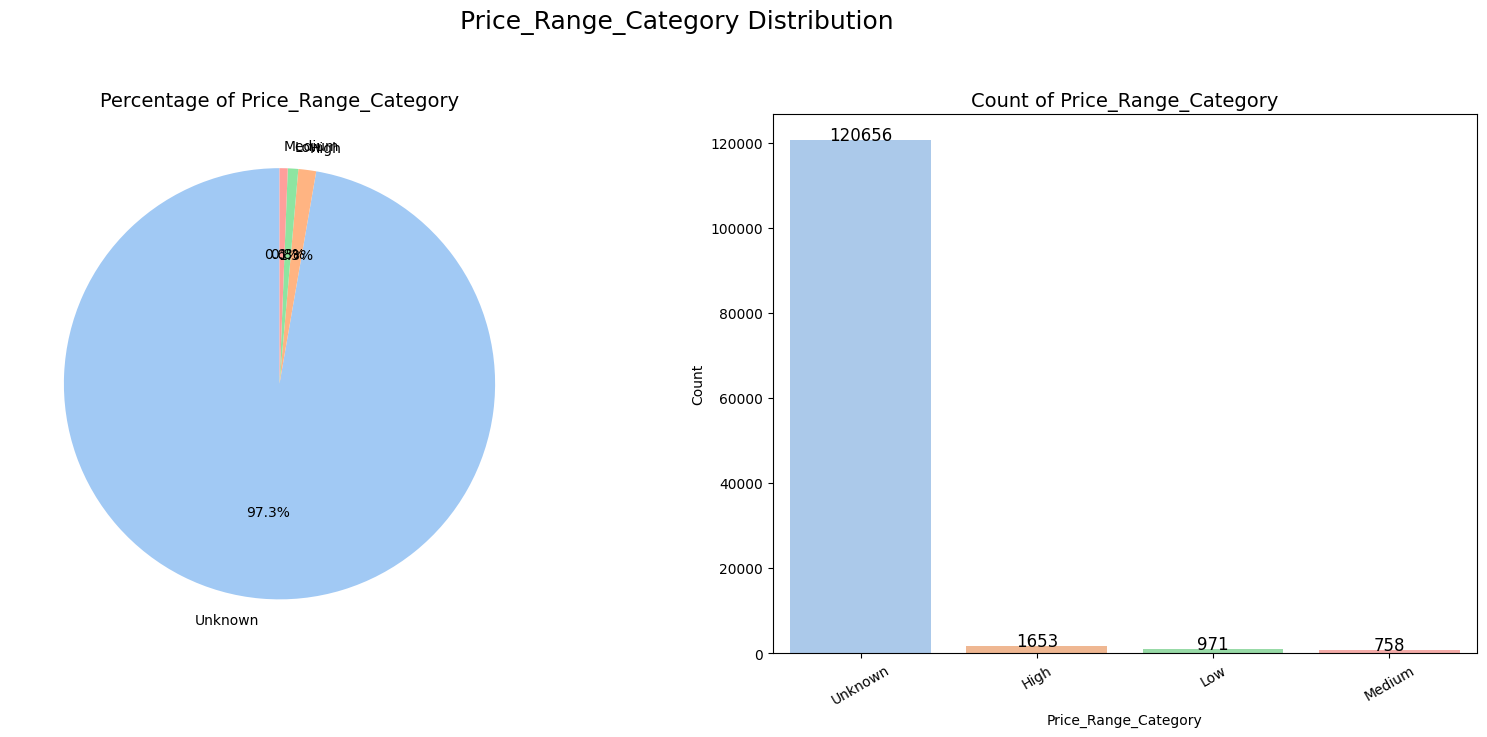

In [ ]:
plot_value_counts(df, 'Price_Range_Category', top_n=4)

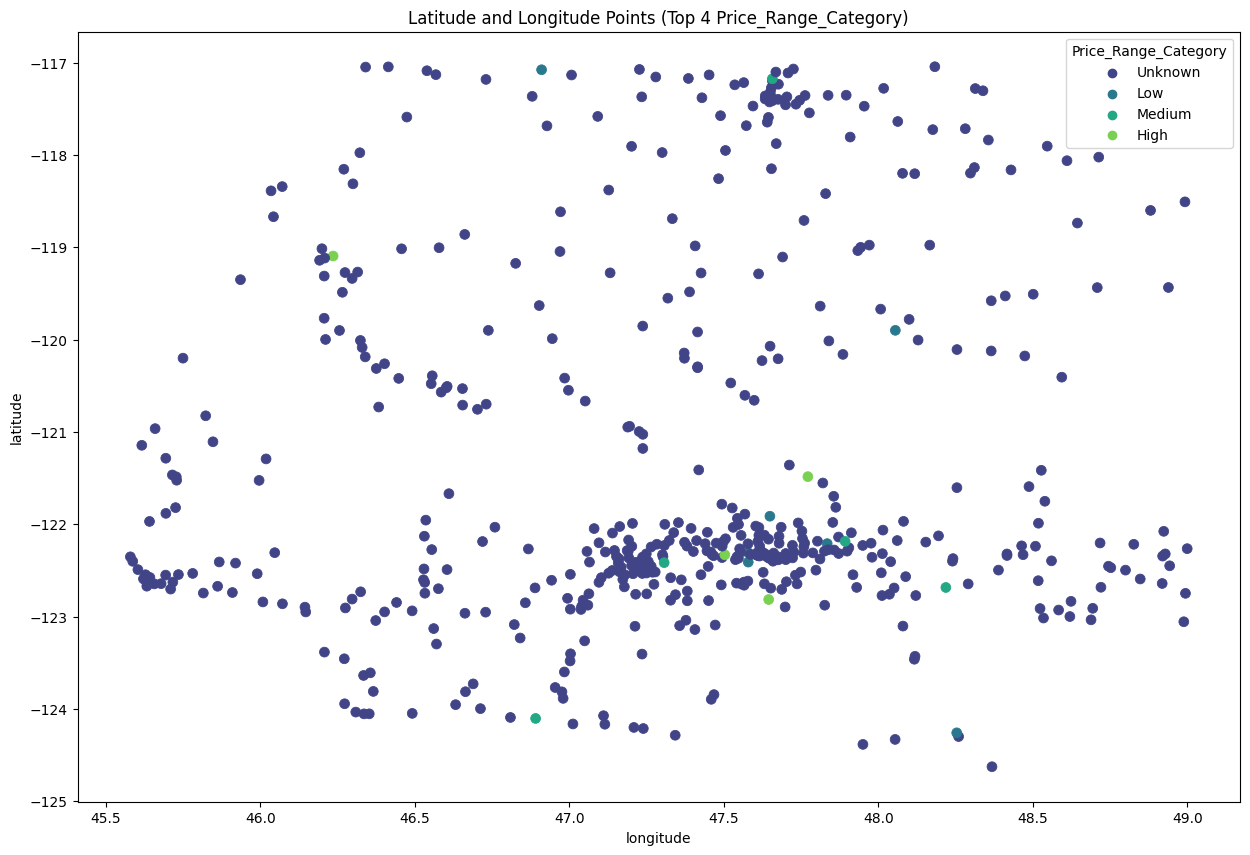

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Price_Range_Category', top_n=4)

**Inference and Insights**

From the above value counts, we can make the following inferences and gain insights:

1. The majority of electric cars in the dataset have an unknown price range category, with 120,656 cars falling into this category. This is likely due to a large number of vehicles having a value of 0 in the 'Base MSRP' column.
2. Only a small percentage of electric cars have a defined price range category, with 1,653 cars falling into the 'High' category, 971 cars falling into the 'Low' category, and 758 cars falling into the 'Medium' category.
3. The price range categories are defined based on the 'Base MSRP' values, with a value of 0 indicating an unknown price range.

Based on the analysis, the following recommendations can be made for electric car advocacies:

1. Encourage more transparency in pricing: Since the majority of electric cars in the dataset have an unknown price range category, electric car advocacies should encourage more transparency in pricing to help consumers make informed purchase decisions.

2. Focus on affordable options: Since only a small percentage of electric cars have a defined price range category and fall into the 'Low' and 'Medium' categories, electric car advocacies should focus on promoting affordable options to make electric cars more accessible to a wider range of consumers.

3. Advocate for more incentives: Given that electric cars tend to be more expensive than gasoline-powered cars, electric car advocacies should advocate for more incentives and subsidies to make electric cars more affordable and promote their adoption.

## Electric Car Dataset Analysis: Electric Utility

The 'Electric Utiltiy' column in the Electric Car dataset provides information about the electric utility companies that provide power for electric cars. The following value counts of the 'Electric Utility' column:

<table>
<tr>
<td> Electric Utility</td>
<td> Count </td>
</tr>
<tr>
<td>PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)</td>
<td> 44926 </td>
</tr>
<tr>
<td>PUGET SOUND ENERGY INC</td>
<td> 24626</td>
</tr>
<tr>
<td>CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)</td>
<td> 23254</td>
</tr>
<tr>
<td>BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)</td>
<td> 7223</td>
</tr>
<tr>
<td>BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY</td>
<td> 5600 </td>
</tr>
<tr>
<td>PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY</td>
<td> 2917 </td>
</tr>
<tr>
<td>BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY</td>
<td>1846</td>
</tr>
<tr>
<td>BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY</td>
<td> 1124</td>
</tr>
<tr>
<td>PACIFICORP</td>
<td> 938</td>
</tr>
<tr>
<td>BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY</td>
<td> 908 </td>
</tr>
</table>

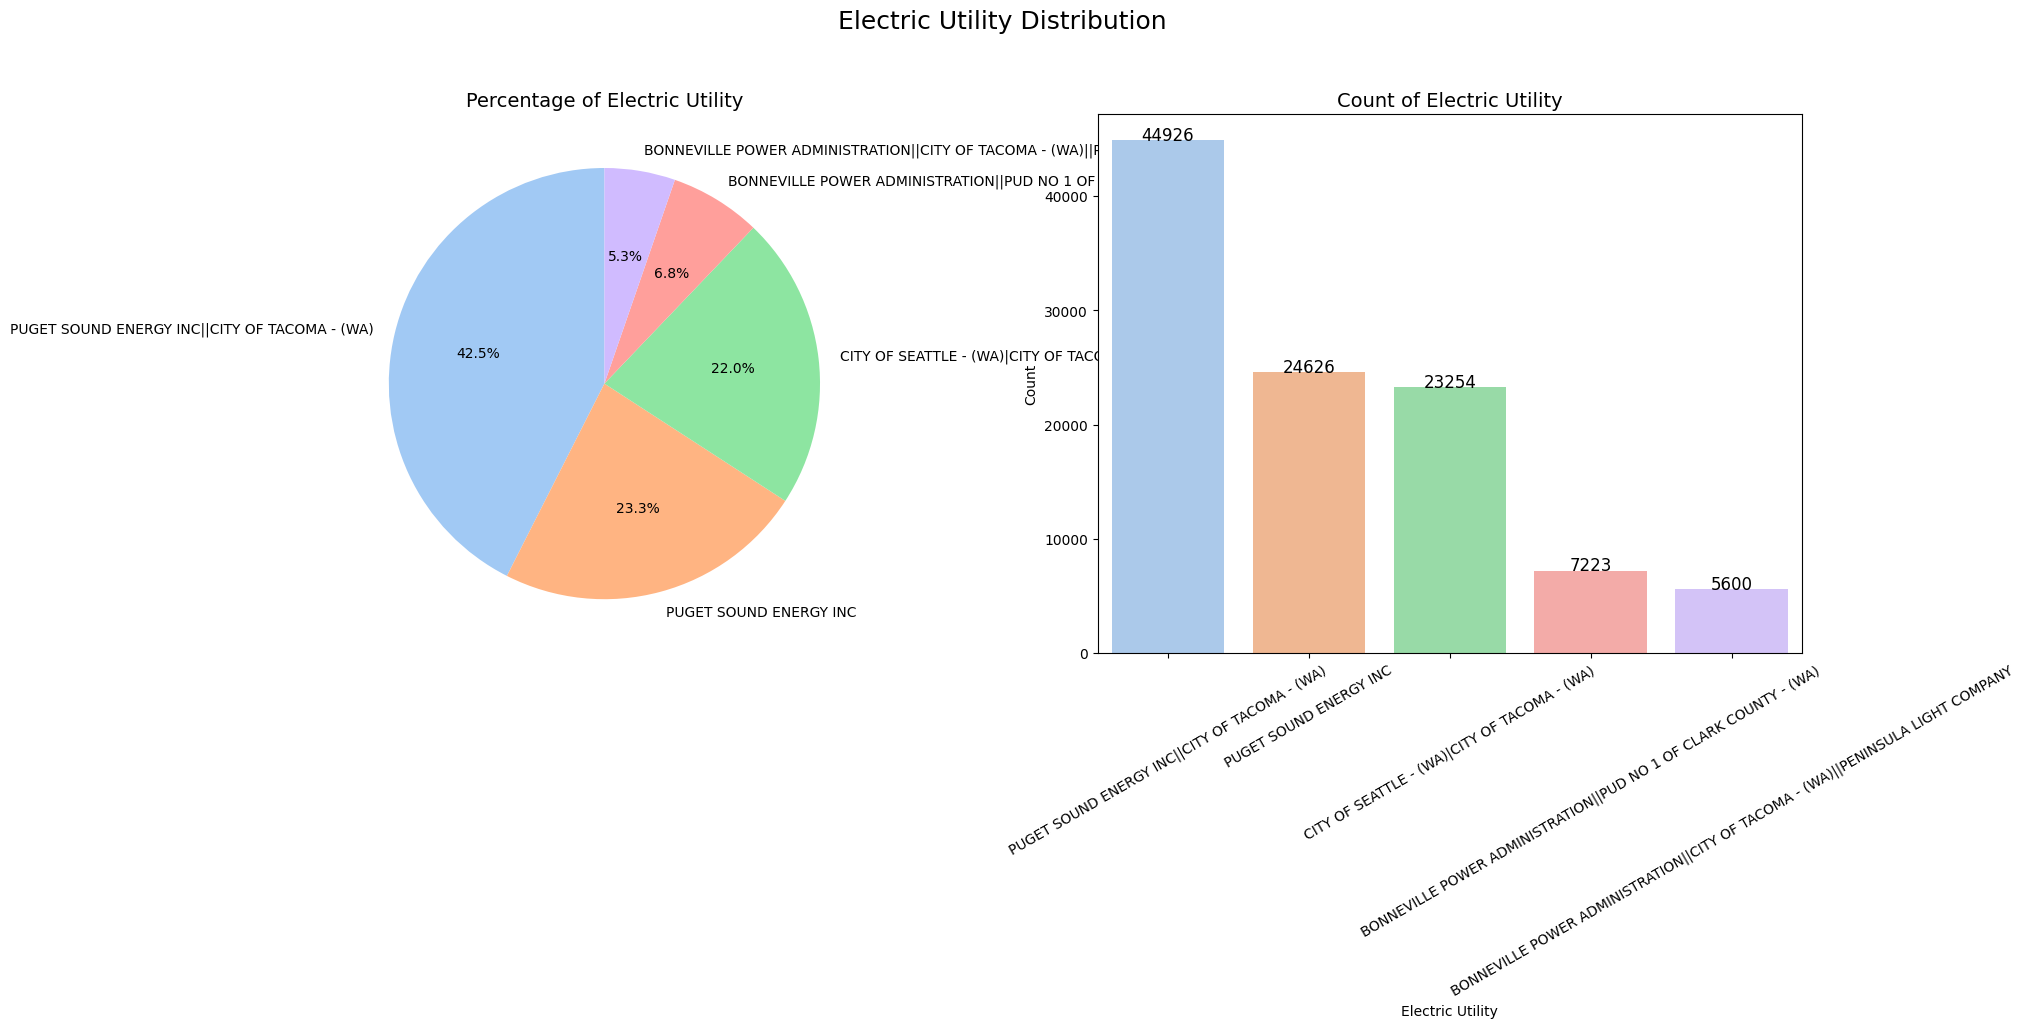

In [ ]:
plot_value_counts(df, 'Electric Utility', top_n=5)

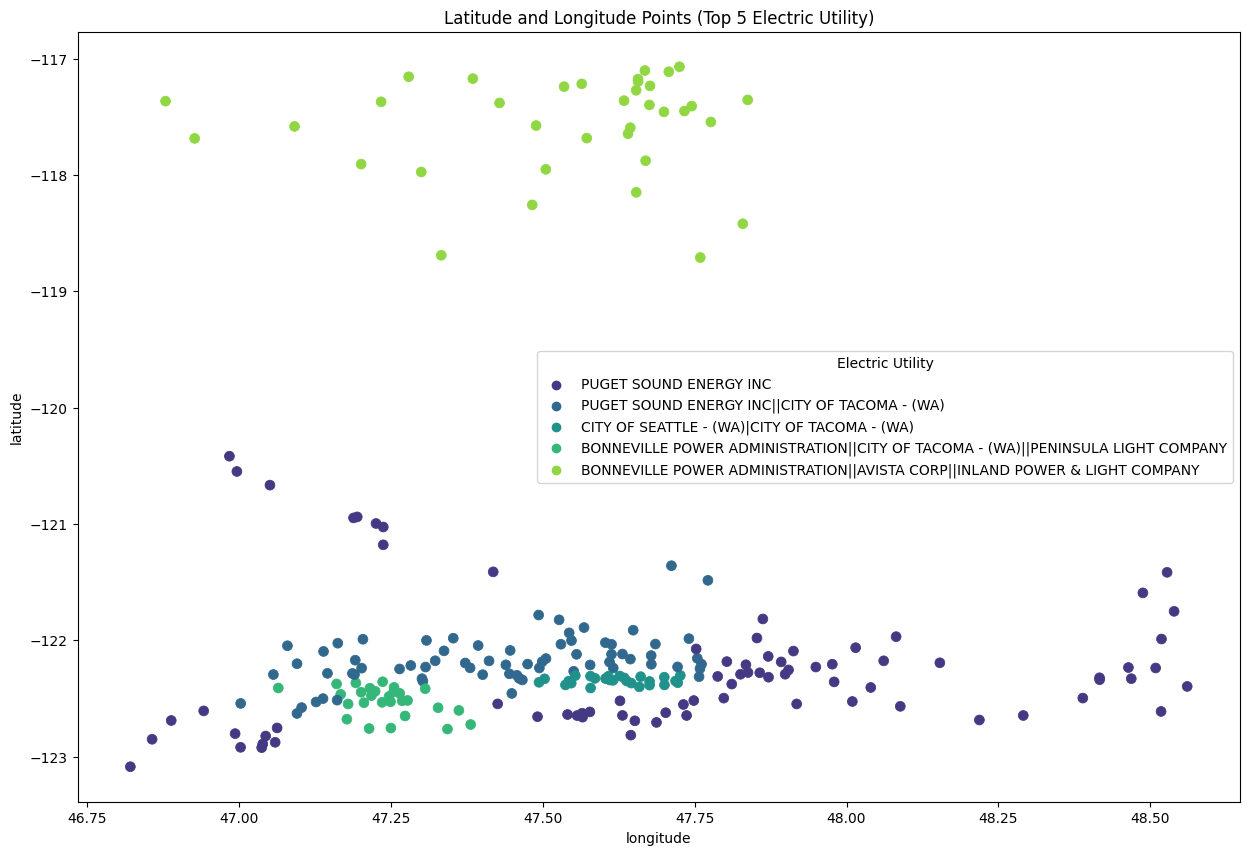

In [ ]:
plot_coordinates_seaborn(df, cmap_column='Electric Utility', top_n=5)

**Inference and Insights**

From the above value counts, we can make the following inferences and gain insights:

1. Puget Sound Energy Inc. is the most common electric utility company in the dataset, with 44,926 electric cars being powered by this company.
2. The next most common electric utility company is PUGET SOUND ENERGY INC (24,626 cars), followed by CITY OF SEATTLE (23,254 cars).
3. There are several other electric utility companies in the dataset, but they have a much lower number of electric cars powered by them.

Based on the analysis, the following recommendations can be made for electric car advocacies:

1. Collaborate with electric utility companies: Since electric cars require a reliable and efficient electric grid to function, electric car advocacies should collaborate with electric utility companies to ensure that the necessary infrastructure is in place to support the widespread adoption of electric cars.

2. Promote the use of renewable energy sources: Many electric utility companies are transitioning to renewable energy sources, such as wind and solar power. Electric car advocacies should promote the use of these renewable energy sources to power electric cars, as they are more sustainable and environmentally friendly.

3. Advocate for more charging stations: To support the widespread adoption of electric cars, there need to be more charging stations available for electric car owners to use. Electric car advocacies should advocate for more charging stations to be built in public places, such as parking lots and rest areas, to make it more convenient for electric car owners to charge their cars.